https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb

In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [101]:
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

### Linear Regression Problem


In [102]:
n = 100

In [103]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]
type(x)

tensor([-0.4437, -0.6005,  0.5444,  0.0913,  0.7961, -0.0777,  0.0025, -0.4035,
        -0.9640, -0.4012,  0.8349,  0.5765,  0.8697, -0.0944,  0.6503, -0.2565,
        -0.7897,  0.3108,  0.2875, -0.0680,  0.0386,  0.3242,  0.2127, -0.5934,
        -0.9618, -0.2997,  0.1755, -0.0487,  0.0817, -0.6156,  0.3060, -0.1691,
        -0.5250,  0.0985,  0.3014, -0.3644, -0.8679, -0.6018,  0.7100, -0.5373,
        -0.2033, -0.7240,  0.1171,  0.1600, -0.5495,  0.0588,  0.2887, -0.2817,
         0.0998, -0.6810,  0.9312, -0.2232, -0.4509, -0.3389,  0.3428,  0.2637,
         0.9405,  0.1342,  0.0013, -0.5894,  0.4519, -0.7543, -0.6509, -0.0794,
        -0.6746, -0.8160, -0.2250, -0.5572, -0.5562,  0.4218, -0.2754,  0.7533,
         0.0904, -0.6612,  0.9362,  0.4308,  0.7579, -0.0552, -0.7103, -0.9700,
        -0.9971,  0.6595,  0.3172, -0.2799,  0.4412,  0.5831, -0.3984,  0.2767,
         0.7243, -0.6689, -0.8441,  0.5761, -0.4168,  0.6967, -0.6164, -0.8199,
         0.9795,  0.4436, -0.0898, -0.17

tensor([[-0.4437,  1.0000],
        [-0.6005,  1.0000],
        [ 0.5444,  1.0000],
        [ 0.0913,  1.0000],
        [ 0.7961,  1.0000]])

torch.Tensor

In [104]:
w_y = torch.tensor([3.,2]);w_y

tensor([3., 2.])

In [105]:
y=x@w_y+torch.rand(n)


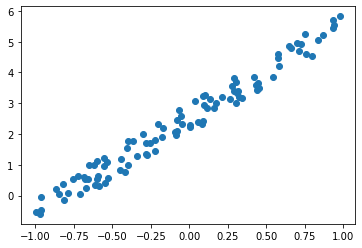

In [107]:
plt.scatter(x[:,0],y)
plt.show();

In [108]:
def mse(y_pred, y_real): return ((y_pred - y_real) ** 2).mean()

### Plot loss function

In [113]:
from mpl_toolkits import mplot3d
import numpy as np

In [114]:
def loss_wrt_wgts(w1,w2):
    w = torch.Tensor([w1, w2])
    y_hat = x@w
    return mse(y_hat, y)
loss_wgts = np.vectorize(loss_wrt_wgts)

In [122]:
w0_range = np.linspace(-20,20, 50)
w1_range = np.linspace(-20,20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)
loss_mesh.shape

(50, 50)

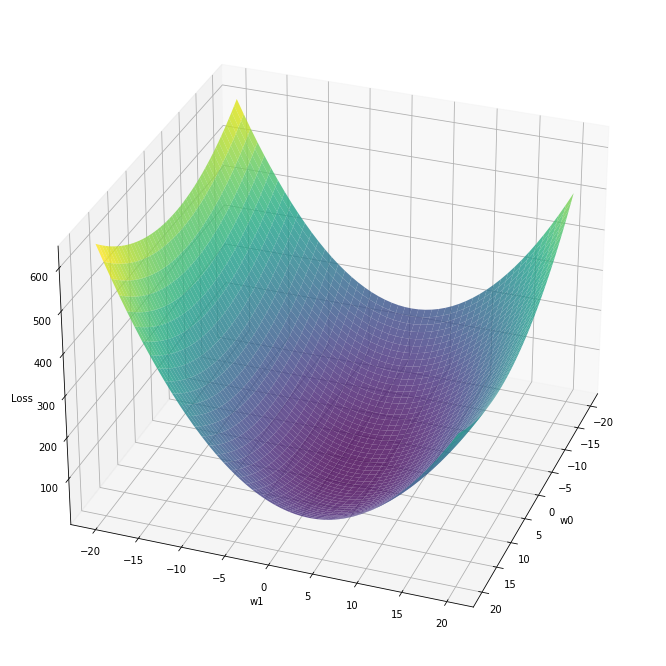

In [116]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
ax.plot_surface(*mesh, loss_mesh, cmap = 'viridis',alpha = 0.8)
ax.set_xlabel('w0'); ax.set_ylabel('w1');ax.set_zlabel('Loss')
ax.view_init(30,20);


### Gradient Descent

In [123]:
def update(w):
    y_hat = x@w
    loss = mse(y_hat, y)
    prev_wgts = w.data.clone()
    loss.backward()
    with torch.no_grad():
       w -= lr * w.grad
       w.grad.zero_()
    return prev_wgts,loss.item()

In [125]:
def train(w0):
    recorder = []
    w = torch.tensor(w0, requires_grad=True)
    for t in range(n_epochs): recorder.append(update(w))
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = torch.stack(rec_wgts)
    return rec_wgts, rec_loss

In [127]:
# hyper parameters
lr = 0.1
n_epochs = 100

#initial parameters (weights)
w0 = [-18., -18.]
rec_wgts, rec_loss = train(w0)

In [128]:
print(rec_wgts[:10])
print(rec_loss[:10])

tensor([[-18.0000, -18.0000],
        [-17.0152, -14.1434],
        [-16.0421, -11.0465],
        [-15.0892,  -8.5574],
        [-14.1623,  -6.5548],
        [-13.2658,  -4.9417],
        [-12.4025,  -3.6407],
        [-11.5742,  -2.5896],
        [-10.7818,  -1.7389],
        [-10.0255,  -1.0489]])
[499.5686340332031, 355.8433532714844, 259.97430419921875, 195.11611938476562, 150.46319580078125, 119.07177734375, 96.46829986572266, 79.76094055175781, 67.07164764404297, 57.173099517822266]


In [74]:
x0 = torch.ones(2,2)
x0[:,0].uniform_(-1.,1.)
w0 = torch.tensor([3.,-1.])
x0,w0 

y=x0@w0+torch.rand(2)

y_hat=x0@w0
print('y_hat:',y_hat)
print('y:',y)

o = mse(y_hat, y)
o

tensor([-0.0651,  0.0632])

(tensor([[-0.0651,  1.0000],
         [ 0.0632,  1.0000]]),
 tensor([ 3., -1.]))

y_hat: tensor([-1.1953, -0.8105])
y: tensor([-0.3527, -0.1607])


tensor(0.5661)

### Animate

In [129]:
from matplotlib import animation
from matplotlib.gridspec import GridSpec
plt.rc('animation',html='html5')

In [130]:
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x[:,0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# plot loss 
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='w0')
line3, = ax2.plot([],[], label='w1')
ax2.set_ylim(-20, 5)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i+1,0].numpy(), rec_wgts[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_wgts[:i+1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'lr: {lr} - Epoch: {i+1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

(-1.0, 6.0)

Text(0.5, 1.0, 'Ground truth & Model')

Text(0.5, 0.92, 'Loss')

Text(0.5, 0, 'w0')

Text(0.5, 0, 'w1')

Text(0.5, 0, 'Loss')

Text(0.5, 1.0, 'Weights & Loss')

(-20.0, 5.0)

(0.0, 100.0)

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'weights')

Text(0, 0.5, 'loss')

RuntimeError: Requested MovieWriter (ffmpeg) not available